# Lecture 1: Depicting Uncertainty

## A Brief Digression on Textboxes

Throughout these lecture notes, you could find textboxes that highlight the following:

```{admonition} Definition
:class: tip
A formal statistical definition of any given concept with a key role in the lecture's main topic.
```

```{important} 
An idea of crucial relevance for the lecture's main topic. Mapping this idea in your learning process will help in the course's lab assignments and quizzes.
```

```{admonition} Note
:class: warning
An idea that might be slightly out of the main scope of the lecture but with particular relevance for subsequent MDS courses.
```

Moreover, you might find some sections marked as "**optional**." This labelling indicates we will not review that specific material in this course. Still, it will have relevance in subsequent courses where we will allocate the necessary lecture time for a broader discussion.

## Learning Goals

By the end of this lecture, you should be able to:

1. Identify probability as a proportion that converges to the truth as you collect more data. 
2. Calculate probabilities using the Inclusion-Exclusion Principle, the Law of Total Probability, and probability distributions.
3. Convert between and interpret odds and probability. 
4. Specify the usefulness of odds over probability.
5. Be aware that probability has multiple interpretations/philosophies.
6. Calculate and interpret mean, mode, entropy, variance, and standard deviation, mainly from a distribution.

## 1. Thinking about Probability

The concept of **probability** is recurring throughout different Data Science-related topics. In MDS, you will find it in either the Statistics or Machine Learning courses. For instance, a fair probability understanding is vital to delivering inferential tools such as *hypothesis testing* and *confidence intervals* (to be discussed in *DSCI 552*). 

``` {figure} img/loteria.jpg
:height: 350px
:name: loteria
Mexican Lotería, a Bingo-type game (photo by <a href="https://unsplash.com/@irvinmac?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">irvin Macfarland</a> on <a href="https://unsplash.com/photos/clelay10tfg?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>)
```

Thus, let us begin with a smooth introduction to the fundamentals of probability.

(probability-definition)=
### 1.1. Defining Probability

We will start with the **formal definition of probability**.

```{admonition} Definition of Probability
:class: tip
In general, the probability of an event $A$ occurring is denoted as $P(A)$ and is defined as 

$$P(A) = \frac{\text{Number of times event $A$ is observed}}{\text{Total number of events observed}},$$

**as the *total number of events observed* goes to infinity**.

This definition will always put $P(A)$ in the following range:

$$0 \leq P(A) \leq 1.$$
```

You might wonder:

> Why are we highlighting "**as the *total number of events observed* goes to infinity**.
"? 

This is a crucial statement in a **frequentist** approach. Frequentist Statistics is the mainstream approach we learn in introductory courses. As its name says, we heavily rely on the "**frequency of events**" to make estimations of specific parameters of interest in a **population** or **system**.

All this might sound quite heavy to digest at first. Hence, let us illustrate the ideas mentioned above with the typical coin toss example. 

``` {figure} img/coin_toss.png
:height: 200px
:name: coin
A coin
```

The coin toss represents our system for which we assume two possible **random outcomes**:

```{math}
\begin{gather*}
H = \{ \text{Getting heads} \} \\
T = \{ \text{Getting tails} \}.
\end{gather*}
```

Our system has the following **parameters of interest**:

```{math}
\begin{gather*}
P(H) = \text{Probability of getting heads} \\
P(T) = \text{Probability of getting tails}.
\end{gather*}
```

Now, let us make this example even more interesting and suppose this coin is unfair, i.e.,

$$P(H) \neq P(T) \neq \frac{1}{2}.$$

Furthermore, **we do not know the real values of the parameters of interest $P(H)$ nor $P(T)$**! And we are indeed interested in learning them. 

Thus, is there a way to overcome this matter? Yes, in cases like this, we rely on **parameter estimation**. 

The intuition behind parameter estimation (i.e., the estimation of both probabilities) lies in tossing the coin **a given number of times**. Then, you count how many times you got heads and tails and divide them over the total number of times you tossed the coin to obtain the estimates of $P(H)$ and $P(T)$, respectively. 

```{important} 
The above intuition for the coin toss example is the foundation of a frequentist approach: **relying on the frequency (or "number"!) of events to estimate your parameters of interest**.
```

Finally, what is the role of the term **"infinity"** here? This is another essential characteristic of frequentist parameter estimation. Roughly speaking, as the number of coin tosses increases (i.e., it tends to infinity), we increase the **accuracy** and **precision** of these parameter estimations of $P(H)$ and $P(T)$.

```{admonition} Note
:class: warning
We have an **accurate** estimate when it converges to the **true** and **unknown** parameter of interest. On the other hand, a **precise** estimate is that one with a small variability. You will explore this terminology more in-depth in *DSCI 552*.
```

### 1.2. Calculating Probabilities using Laws

Now, we will look at **two fundamental laws of probability**: the **Law of Total Probability** and the **Inclusion-Exclusion Principle**. To introduce these two laws, let us set up a different and more substantial example.

Possibly, some of us are avid Nintendo gamers, and we also like playing Mario Kart 8! This is a racing game with some "combat" involved in using items. Within the game, you are given an item **randomly** whenever you get an "*item box*."

Putting aside the estimation paradigm (we will leave that for subsequent courses such as *DSCI 552*), suppose we have access to the game's source code and **we know the true probabilities for each item to appear**. Also, let us add some properties to these items such as *Combat Type* and whether the item *Defeats Blue Shells* or not. 

```{list-table} True probabilities for each item to appear in a Mario Kart 8's item box (images from [pngkey](https://www.pngkey.com/detail/u2w7e6o0i1q8i1y3_randome-clipart-mario-kart-mario-kart-8-deluxe/))
:header-rows: 1
:name: mario-kart

* - Item
  - Name
  - Probability
  - Combat Type
  - Defeats Blue Shells
* - ![](img/banana.png)
  - Banana
  - 0.12
  - contact
  - no
* - ![](img/bobomb.png)
  - Bob-omb
  - 0.05
  - explosion
  - no
* - ![](img/coin.png)
  - Coin
  - 0.75
  - ineffective
  - no
* - ![](img/horn.png) 
  - Horn
  - 0.03
  - explosion
  - yes
* - ![](img/shell.png)
  - Shell
  - 0.05
  - contact
  - no
```

(law-total-probability)=
#### 1.2.1.  Law of Total Probability

Let us start with a couple of formal definitions. The first one is a foundational concept called the **sample space**.

```{admonition} Definition of Sample Space
:class: tip
The sample space, usually represented with the letter $S$, is the collection of all the possible outcomes of a **random process or system**. Each one of these outcomes has a probability associated with it. These probabilities have to add up to one in this sample space, i.e., 

$$P(S) = 1.$$
```

Next, we could proceed defining the Law of Total of Probability using mathematical notation. Nevertheless, this would require going into more complex Probability Theory, which is out of the scope of this course. That said, we will still define this law using plain words, as below.

```{admonition} Definition of the Law of Total Probability
:class: tip
The Law of Total Probability allows us to break down the sample space $S$ of a random process or system into disjoint parts. Hence, for example, if we are interested in computing the probability of an event $A$, then we can use these sample space partitions to do so.
```

Now, to apply the above definitions via a numerical example, let us work on some in-class exercises.

```{exercise}
:label: lecture1-q1

According to {numref}`mario-kart`, are there any other items possible? Why or why not?
```

In [7]:
library(treemapify)
library(tidyverse)

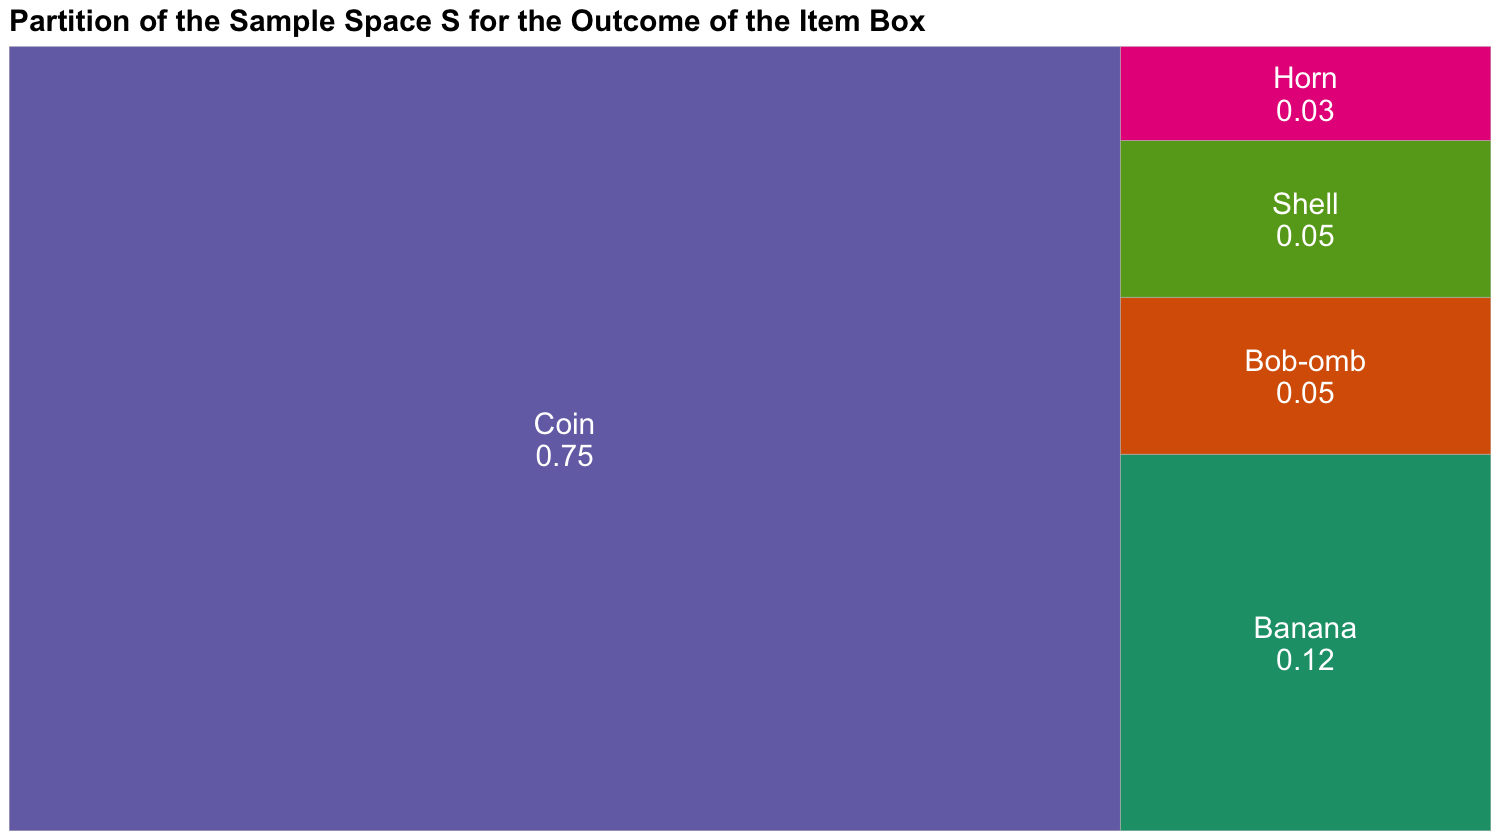

In [8]:
options(repr.plot.width = 12.5)

item_box_prob <- tibble(
  item = c("Banana", "Bob-omb", "Coin", "Horn", "Shell"),
  defeat = c(rep("no", 3), "yes", "no"),
  prob = c(0.12, 0.05, 0.75, 0.03, 0.05)
)

ggplot(item_box_prob, aes(
  area = prob, fill = item,
  label = paste(item, prob, sep = "\n")
)) +
  geom_treemap() +
  geom_treemap_text(
    colour = "white",
    place = "centre",
    size = 18
  ) +
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Dark2") +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
  ) +
  ggtitle("Partition of the Sample Space S for the Outcome of the Item Box")

```{exercise}
:label: lecture1-q2

What is the probability of getting something other than a coin? How can we arrive at that number?
```

We will use another probability concept called the **complement** of an event. It relies on the characteristics of the sample space and Law of Total Probability. Hence, before solving {ref}`lecture1-q2`, let us check the below definition.

```{admonition} Definition of the Complement of an Event
:class: tip
In general, for a given event $A$, the complement is the subset of other outcomes that do not belong to event $A$:

$$1 = P(A) + P(A^c),$$ 

where $^c$ means the complement (we read it as "not").
```

Now, let us introduce another class of plot to help us illustrate the probabilities of different events of interest. It is called the **Venn diagram**.

```{admonition} Definition of the Venn Diagram
:class: tip
A Venn diagram allows us to illustrate the logical relationships, in terms of probability, between different events of interest within a random process or system. Each event probability is represented by a circle, which lies on the whole sample space $S$.
```

The below plot is a Venn diagram representing a single event of interest as a circle: *getting a coin from the item box*. Note that this event probability, the blue circle, lies on the whole sample space $S$.

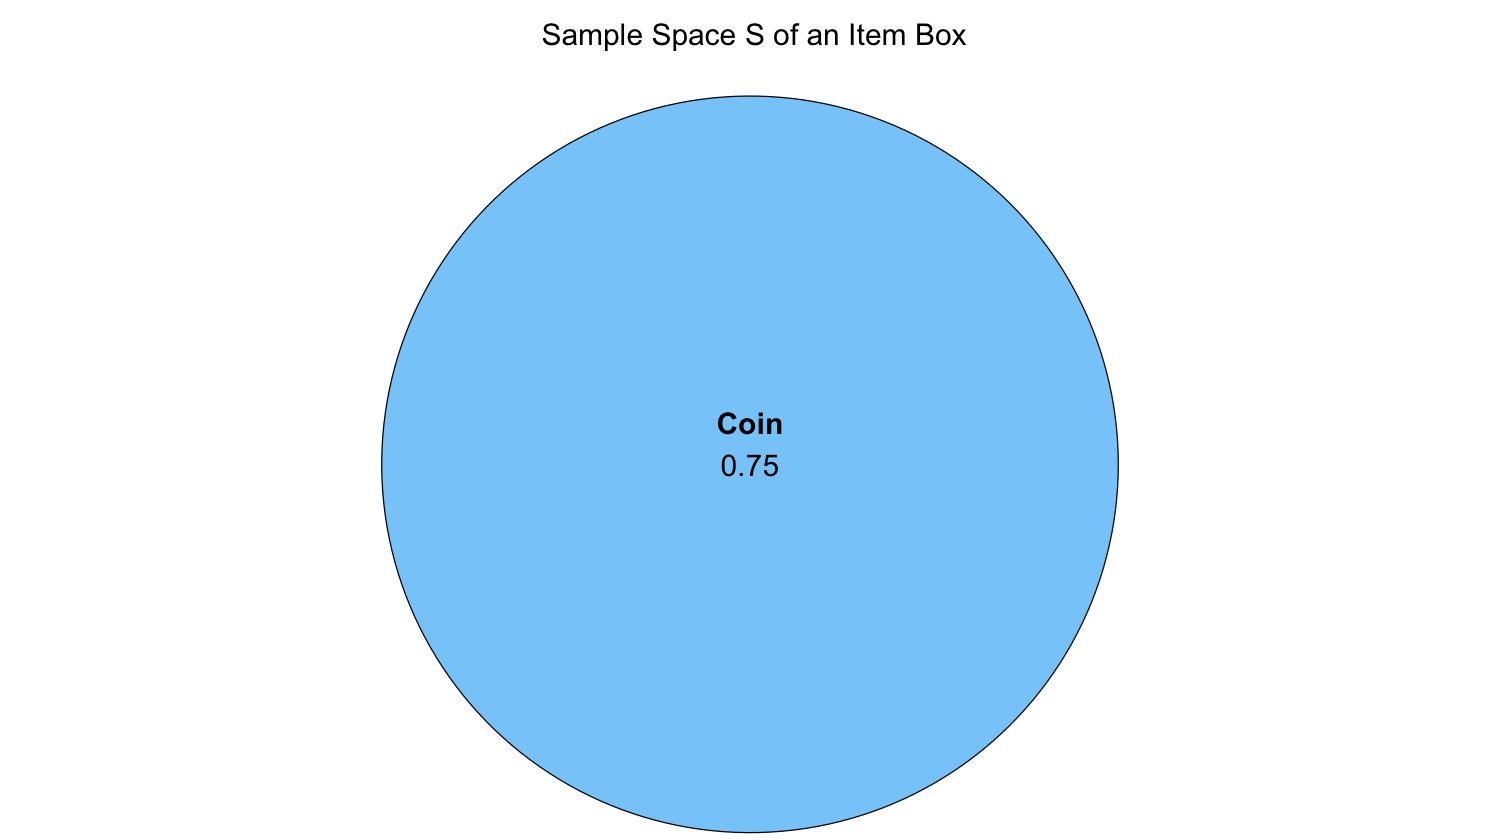

In [9]:
library(eulerr)
coin_venn <- euler(c("Coin" = 0.75))

plot(coin_venn,
  quantities = list(fontsize = 18), fills = "lightskyblue",
  labels = list(cex = 1.5),
  main = "\n Sample Space S of an Item Box"
)

#### 1.2.2. Inclusion-Exclusion Principle

To learn the application of this principle, we will work on the following questions altogether. But beforehand, we need define it.

````{admonition} Definition of the Complement of the Inclusion-Exclusion Principle
:class: tip
Let $A$ and $B$ be two events of interest in the sample space $S$. The probability of $A$ or $B$ occuring is denoted as $P(A \cup B)$, where $\cup$ means **"OR."** The Inclusion-Exclusion Principle allows us to compute this probability as:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B),$$

where $P(A \cap B)$ denotes the probability of $A$ and $B$ occuring simultaneously ($\cap$ means **"AND"**). Note we can also extend this principle to three events ($A$, $B$, and $C$ in the sample space $S$):

```{math}
\begin{align*}
P(A \cup B \cup C)) &= P(A) + P(B) + P(C) - P(A \cap B) - P(B \cap C) - P(A \cap C) + \\
& \qquad P(A \cap B \cap C),
\end{align*}
```

where $P(A \cap B \cap C)$ denotes the probability of $A$, $B$, and $C$ occuring simultaneously.

In general, this principle could be extended to a further number of events.
````

Now, let us solve the following exercises.

```{exercise}
:label: lecture1-q3

Using {numref}`mario-kart`, what is the probability of getting an item with an explosion combat type (event $E$)?
```

For {ref}`lecture1-q3`, we will need to introduce the below definition related to mutually exclusive (or disjoint) events.

````{admonition} Definition of Mutually Exclusive (or Disjoint) Events
:class: tip
Let $A$ and $B$ be two events of interest in the sample space $S$. These events are mutually exclusive (or disjoint) if they cannot happen at the same time in the sample space $S$. Thus, in probability notation, their intersection will be:

```{math}
P(A \cap B) = 0.
```

Therefore, by the Inclusion-Exclusion Principle, the union of these two events can be obtained as follows:

```{math}
\begin{align*}
P(A \cup B) &= P(A) + P(B) - \underbrace{P(A \cap B)}_{0} \\
&= P(A) + P(B).
\end{align*}
```
````

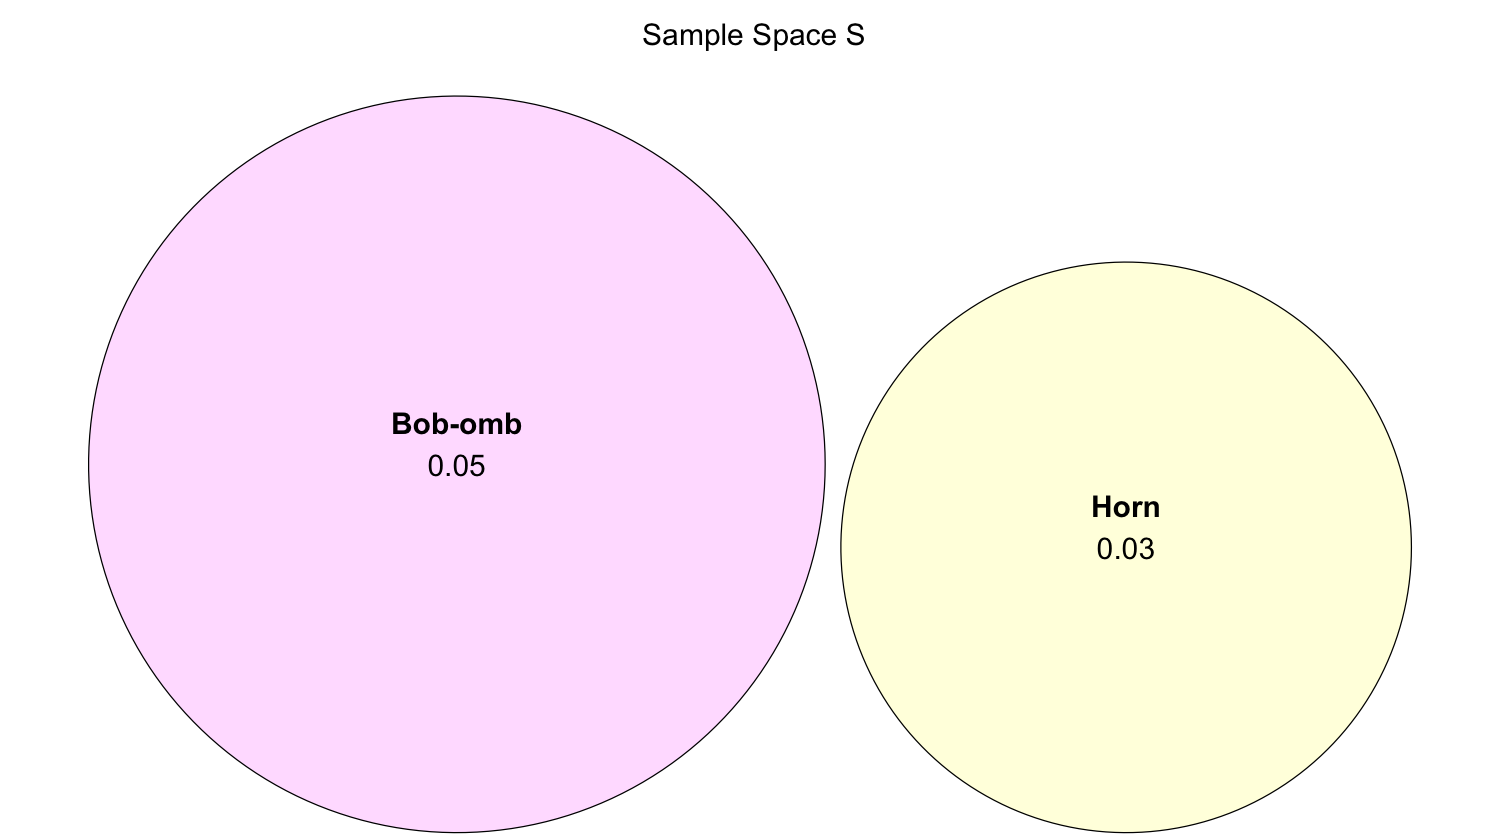

In [10]:
explosion_venn <- euler(c("Bob-omb" = 0.05, "Horn" = 0.03))

plot(explosion_venn,
  quantities = list(fontsize = 18), fills = c("thistle1", "lightyellow"),
  labels = list(cex = 1.5),
  main = "\n Sample Space S"
)

```{exercise}
:label: lecture1-q4

What is the probability of getting an item that is both an explosion item (event $E$) and defeats blue shells (event $D$)?

The below Venn diagram can help you to solve this probability puzzle along with {numref}`mario-kart`.
```

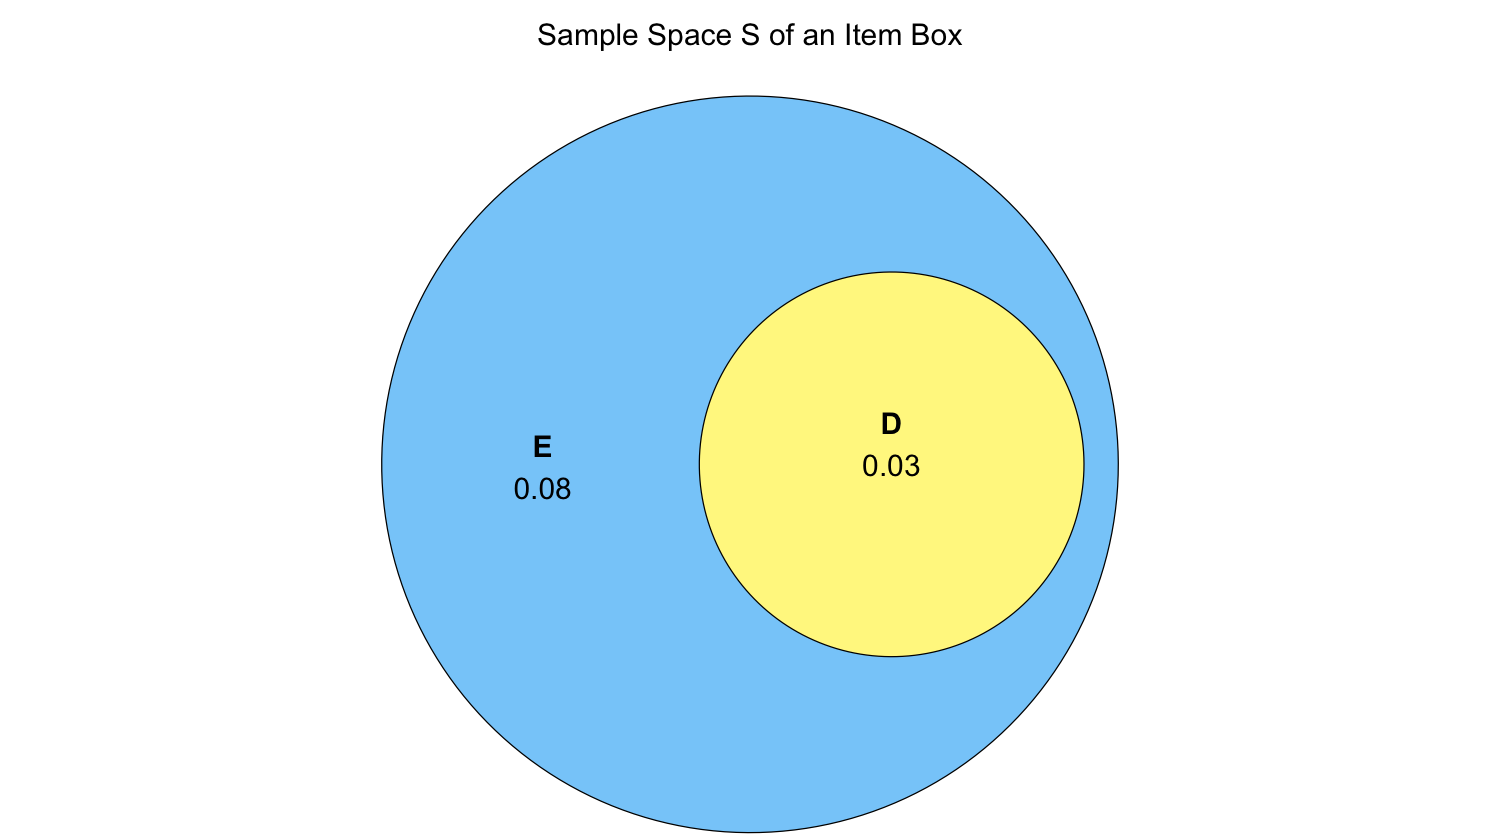

In [11]:
q4_venn <- euler(c("E" = 0.08, "E&D" = 0.03))

plot(q4_venn,
  quantities = list(fontsize = 18), fills = c("lightskyblue", "khaki1"),
  labels = list(cex = 1.5),
  main = "\n Sample Space S of an Item Box "
)

```{exercise}
:label: lecture1-q5

What is the probability of getting an item that is an explosion item (event $E$) or an item that defeats blue shells (event $D$)?

The below Venn diagram can help you to solve this probability puzzle along with {numref}`mario-kart`.
```

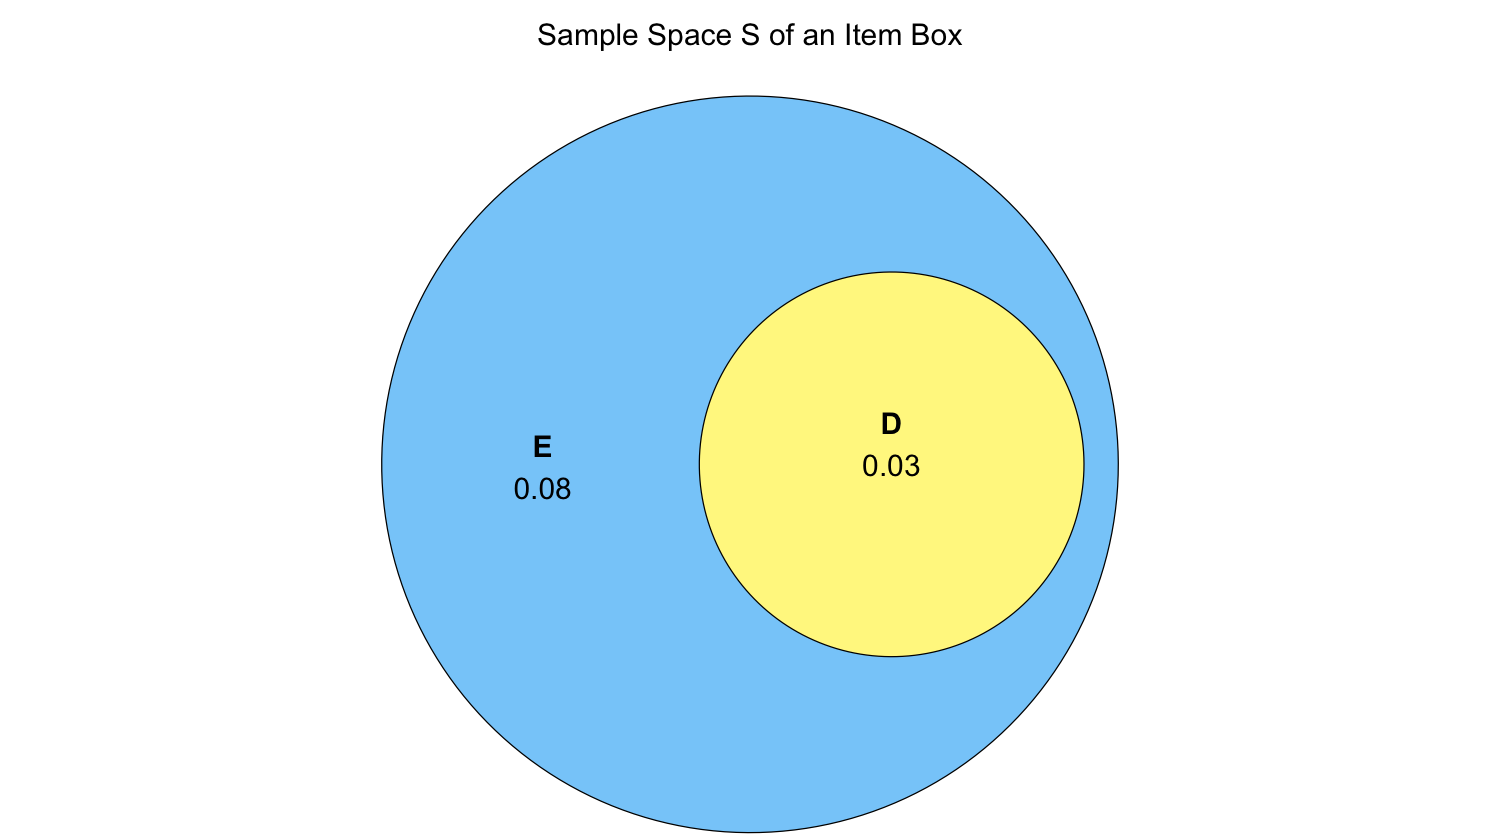

In [12]:
plot(q4_venn,
  quantities = list(fontsize = 18), fills = c("lightskyblue", "khaki1"),
  labels = list(cex = 1.5),
  main = "\n Sample Space S of an Item Box "
)

(independent-events)=
#### 1.2.3. Independent Events

Let $A$ and $B$ be two events of interest in the sample space $S$. These two events are independent if the occurrence of one of them does not affect the probability of the other. In probability notation, their intersection is defined as:

```{math}
:label: independence
P(A \cap B) = P(A) \cdot P(B).
```

```{important} 
Having independent events is different from mutually exclusive (or disjoint) events. In the case of independent events, they could still happen simultaneously, unlike mutually exclusive events.
```

### 1.3. Comparing Probabilities

Probability is quite useful for communicating the chance of an event happening in an absolute sense, but what if we want to compare probabilities? In that case, the **odds** are quite helpful in comparing the chance of two events.

```{admonition} Definition of Odds
:class: tip
Let $p$ be the probability of an event of interest $A$. The odds $o$ is the ratio of the probability of the event $A$ to the probability of the non-event $A$:

$$o = \frac{p}{1 - p}.$$

In plain words, the odds will tell how many times event $A$ is more likely compared to how unlikely it is.
```

For instance, suppose you often win at a game of solitaire. If $p$ is the chance that you win at solitaire, your *odds of winning* $o$ is defined as 

$$o = \frac{p}{1 - p}.$$ 

This means that, **after some algebraic rearrangements**, the probability of winning $p$ is 

$$p = \frac{o}{o+1}.$$

Hence, if you win 80% (i.e., $p = 0.8$) of the times, your odds are 

$$o = \frac{p}{1 - p} = \frac{0.8}{0.2} = 4.$$ 

This is sometimes written as 4:1 odds -- that is, *four wins for every loss*. 

Now suppose that your friend is twice as good as you, it is *most useful* to say that this means your friend wins twice as many games before experiencing a loss -- that is, 8:1 odds, or simply 8, and a probability of 

$$0.89 = \frac{8}{8 + 1}.$$


```{admonition} Note
:class: warning
Understanding the interpretation of the odds in probability is key for subsequent data models such as logistic regression (to be covered in *DSCI 562*).
```

### 1.4. Interpreting Probability (Optional Section)

Probabilities are the way we have to represent **uncertainty**. This is especially critical regarding **inferential** matters in a given population or system. As a Data Scientist, you will usually work with **sampled data** involving uncertainty. Moreover, note we can interpret probability in two ways: frequentist or **Bayesian**. For example:

1. What is the probability of seeing a six after rolling a die? (*frequentist*)
2. If I roll a die and cover the outcome, what is the probability of seeing a six after I uncover the face? (*Bayesian*)

**Note no paradigm is "wrong"!** But why is this relevant in practice? We can state the following about both paradigms:

- It often does not actually make sense to talk about the probability of an event, such as the probability that a patient has a particular disease in a *frequentist* way. Instead, it is a belief system that can be modified **given the patient's background**. This is more of a Bayesian approach that relies on some **prior knowledge**.
- In statistical inference and data modelling, it influences our choice of whether we choose a *Bayesian* or *frequentist* analysis. More on this later in *DSCI 552* and *553*.

## 2. Probability Distributions

So far, we have been discussing probabilities of single events. But it is often useful to characterize the full "spectrum" of uncertainty associated with an outcome. This paves the way to two important probabilistic concepts: **probability distribution** and **random variable**.

```{admonition} Definitions of Probability Distribution and Random Variable
:class: tip
A probability distribution (or, often, just **distribution**) is the set of all outcomes and their corresponding probabilities in the sample space $S$ of a random process or system.

Now, the outcome itself of this probability distribution belongs to a random variable. In Statistics, a random variable is denoted with an uppercase. For example:

$$X = \text{Number of customers standing in line at a bank branch.}$$
```

In general, random variables are classified as follows:

- **Continuous:** A continuous random variable can take on a set of uncountable outcomes (e.g., variables that could have decimal places such as length, mass, time, etc.). In this case, the probability distribution is called **probability DENSITY function (PDF).**
- **Discrete:** A discrete random variable can take on a set of countable values (e.g., variables that could be binary, categorical either ordinal or nominal, or counts). In this case, the probability distribution is called **probability MASS function (PMF).**

```{important} 
A random variable does not necessarily need to be numerical. For instance, we can encounter discrete categorical random variables such as the item box in the Mario Kart 8 example in {numref}`mario-kart`.
```

### 2.1. Examples of Probability Mass Functions

Let us continue with the Mario Kart 8 example using {numref}`mario-kart` as our starting point. {numref}`pmf-y` corresponds to a PMF if we have the following discrete random variable:

$$Y = \text{Item obtained from the box.}$$

```{list-table} Probability mass function (PMF) of categorical random variable $Y$
:header-rows: 1
:name: pmf-y

* - Illustration
  - $Y$
  - Probability
* - ![](img/banana.png)
  - Banana
  - 0.12
* - ![](img/bobomb.png)
  - Bob-omb
  - 0.05
* - ![](img/coin.png)
  - Coin
  - 0.75
* - ![](img/horn.png) 
  - Horn
  - 0.03
* - ![](img/shell.png)
  - Shell
  - 0.05
```

We can also have an alternative PMF, as in {numref}`pmf-z-mario`, by setting up another random variable:

$$Z = \text{Combat type of an item obtained from the box.}$$

```{list-table} Probability mass function (PMF) of categorical random variable $Z$
:header-rows: 1
:name: pmf-z-mario

* - $Z$
  - Probability
* - contact
  - 0.17
* - explosion
  - 0.08
* - ineffective
  - 0.75
```

If we want to set up a random variable on whether the item defeats blue shells or not (again, check the original {numref}`mario-kart`), the corresponding PMF in {numref}`pmf-w` associated to

$$W = \text{Whether the item obtained from the box defeats blue shells or not,}$$

becomes **binary** (i.e., categories "*yes*" or "*no*").


```{list-table} Probability mass function (PMF) of categorical and binary random variable $W$
:header-rows: 1
:name: pmf-w

* - $W$
  - Probability
* - yes
  - 0.03
* - no
  - 0.97
```

Finally, let us put aside the previous categorical PMFs and explore a numerical one related to a **count** (which is still discrete). 

``` {figure} img/ship.png
:height: 350px
:name: ship
A cargo ship
```

Suppose a cargo ship arriving at Vancouver port will stay there. We can define the count-type random variable

$$C = \text{Length of cargo ship stay in days.}$$

```{list-table} Probability mass function (PMF) of count-type random variable $C$
:header-rows: 1
:name: pmf-v

* - $C$
  - Probability
* - 1
  - 0.25
* - 2
  - 0.50
* - 3
  - 0.15
* - 4
  - 0.10
```

The fact that $C$ is a count means that we can pave the way to a specific **discrete distribution** as we will see further in this course.

```{important} 
Note that all the previous probability distributions add up to 1. This fact indicates that no other outcome can occur except for the ones in the corresponding tables. For instance, in the case of the cargo ship stay, the PMF denotes that there is **no chance** that the ship will stay longer than four days, i.e., 

$$P(C > 4) = 0.$$
```

```{admonition} Note
:class: warning
It is crucial we start thinking about all the different types of random variables (i.e., discrete or continuous) we can encounter in Data Science-related problems. A proper random variable classification will allow us to set up the **most suitable data modelling**.
```

## 3. Measures of Central Tendency and Uncertainty

Once we have introduced the concept of a random variable and its corresponding probability distribution, we need to find a way to summarize all this information adequately. A random variable summary allows us to get further insights into how this variable behaves in the long run regarding **typical values** and **variability**. Hence, let us introduce two concepts for this purpose.

```{admonition} Definitions of Central Tendency and Uncertainty Metrics
:class: tip
In general, a random variable can be summarized with two classes of metrics:

1. **Central tendency**. It is a metric denoting a "typical" value in a random variable. For example, a mean (commonly known as an "average") or a median.
2. **Uncertainty**. It is a measure of how "spread" the random variable is. For example, a standard deviation.
```

There are different measures of central tendency and uncertainty. Following up with {ref}`probability-definition`, these measures are called **parameters** when it comes to a population. Parameters are defined via a probability distribution. For instance, some of us might be familiar with the Normal distribution. This distribution is characterized by its mean (a central tendency metric) and standard deviation (an uncertainty metric). 

```{admonition} Note
:class: warning
Analogous to a probability that can be defined as the limit of a fraction based on a **sample**, these parameters are estimated via **sample statistics**. As such, let us call $X$ the random variable, and $X_1, \ldots, X_n$ a set of $n$ **observations** that form a sample.

Sampling concepts are related to statistical inference (to be discussed in *DSCI 552*).
```

```{important} 
Let us be cautious when using the plural term **samples** in Statistics and Machine Learning since it has different meanings depending on the field (check the [MDS Stat-ML dictionary](https://ubc-mds.github.io/resources_pages/terminology/#sample) for further references).
```

### 3.1. Mode and Entropy

These two metrics are commonly used with discrete random variables. No matter the class of discrete random variable, we can always calculate the **mode** and **entropy**. 

```{important} 
When the outcome is **discrete and categorical** (like the Mario Kart 8 example), we are pretty much stuck with these two measures as our choices.
```

```{admonition} Definition of Mode in Discrete Random Variables
:class: tip
The mode of a distribution is the outcome having the highest probability.
```

The above metric has the following characteristics:

- It is a measure of central tendency.
- Its sample version is the observation you saw the most in your data collection.
- It is measured as an *outcome*, not as the probabilities.

````{admonition} Definition of Entropy in Discrete Random Variables
:class: tip
The entropy of a discrete random variable $X$ is defined as

```{math}
:label: entropy-discrete
H(X) = -\displaystyle \sum_x P(X = x)\log[P(X = x)].
```

Note that, in Statistics, the $\log(\cdot)$ notation implicates base $e$. 
````

The above metric has the following characteristics:

- It is a measure of uncertainty. An entropy equal to zero means no randomness.
- It cannot be negative.
- The concept of entropy was introduced in information theory by Claude Shannon. Entropy can be thought of as the average amount of "information" produced by a random process, where "information" is a measure of surprise, quantified as $-\log P(X = x)$.
- It is measured as a transformation of probabilities, not as the outcomes.



(mean-and-variance)=
### 3.2. Mean and Variance

When our random variable is numeric (either discrete or continuous), we can take advantage of this property and calculate the **mean** and **variance**.

````{admonition} Definition of Mean
:class: tip
Let $X$ be a numeric random variable. The mean $\mathbb{E}(X)$ (also known as **expected value** or **expectation**) is defined as:

- If $X$ is discrete, with $P(X = x)$ as a PMF, then

```{math}
:label: mean-discrete
\mathbb{E}(X) = \displaystyle \sum_x x \cdot P(X = x).
```

- If $X$ is continuous, with $f_X(x)$ as a PDF, then 

```{math}
:label: mean-continuous
\mathbb{E}(X) = \displaystyle \int_x x \cdot f_X(x) \text{d}x.
```

The mean $\mathbb{E}(X)$ is the mainstream measure of central tendency for numeric random variables.
````

Note that, in general for a function of $X$ such as $g(X)$, the expected value is defined as:

- If $X$ is discrete, with $P(X = x)$ as a PMF, then

```{math}
:label: mean-function-discrete
\mathbb{E}\left[ g(X) \right] = \displaystyle \sum_x g(X) \cdot P(X = x).
```

- If $X$ is continuous, with $f_X(x)$ as a PDF, then 

```{math}
:label: mean-function-continuous
\mathbb{E}\left[ g(X) \right] = \displaystyle \int_x g(X) \cdot f_X(x) \text{d}x.
```

````{admonition} Note
:class: warning
We can usually estimate $\mathbb{E}(X)$ via the **sample mean**

```{math}
:label: sample-mean
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i.
```

Moreover, **under specific conditions** (to be discussed in *DSCI 552*), the sample mean $\bar{X}$ converges to the true mean $\mathbb{E}(X)$ as the sample size $n \rightarrow \infty$.
````

```{admonition} Definition of Variance
:class: tip
The variance is defined as 

$$\text{Var}(X) = \mathbb{E}\{[X - \mathbb{E}(X)]^2\}.$$

After some algebraic rearrangements and some expected value properties, the expression above is equivalent to

```{math}
:label: variance
\text{Var}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2.
```

Note that $\text{Var}(X)$ is a numeric measure of uncertainty. Furthermore, as shown in the two expressions above, the variance is an expectation (specifically, the squared deviation from the mean).

```{admonition} Note
:class: warning
We can usually estimate $\text{Var}(X)$ via the **sample variance** 

$$S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2.$$

Moreover, **under specific conditions** (to be discussed in *DSCI 552*), the sample variance $S^2$ converges to the true variance $\text{Var}(X)$ as the sample size $n \rightarrow \infty$.
```

Note that, as in the case of entropy, the variance cannot be negative. Also, a zero variance means no randomness. On the other hand, unlike entropy, the variance depends on the actual values of the random variable.

Finally, the **standard deviation** is the square root of the variance: 

```{math}
:label: sd
\text{SD}\left[ \text{Var}(X) \right] = \sqrt{\text{Var}(X)}.
```

This measure is more practical because it is on the same scale as the outcome, unlike the variance.

```{important} 
There are some other numeric measures of central tendency and uncertainty. We will check them later on during this block.
```